# VGGNet Architecture

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import MultiLabelBinarizer

### VGGNet model

In [2]:
base_units = 32
weight_decay = 1e-4
exp_conv = Sequential()

exp_conv.add(Input(shape=(56, 56, 3)))

# conv 1
exp_conv.add(Conv2D(filters=base_units * 2, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 2
exp_conv.add(Conv2D(filters=base_units * 2, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# pool and dropout
exp_conv.add(MaxPooling2D(pool_size=(2, 2)))
exp_conv.add(Dropout(0.2))

# conv 3
exp_conv.add(Conv2D(filters=base_units * 4, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 4
exp_conv.add(Conv2D(filters=base_units * 4, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# pool and dropout
exp_conv.add(MaxPooling2D(pool_size=(2, 2)))
exp_conv.add(Dropout(0.3))

# conv 5
exp_conv.add(Conv2D(filters=base_units * 8, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 6
exp_conv.add(Conv2D(filters=base_units * 8, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 7
exp_conv.add(Conv2D(filters=base_units * 8, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 8

# pool and dropout
exp_conv.add(MaxPooling2D(pool_size=(2, 2)))
exp_conv.add(Dropout(0.4))

# conv 9
exp_conv.add(Conv2D(filters=base_units * 16, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 10
exp_conv.add(Conv2D(filters=base_units * 16, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 11
exp_conv.add(Conv2D(filters=base_units * 16, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# pool and dropout
exp_conv.add(MaxPooling2D(pool_size=(2, 2)))
exp_conv.add(Dropout(0.4))

# conv 12
exp_conv.add(Conv2D(filters=base_units * 16, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 13
exp_conv.add(Conv2D(filters=base_units * 16, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# conv 14
exp_conv.add(Conv2D(filters=base_units * 16, kernel_size=(3, 3), padding='same', activation=relu))
exp_conv.add(BatchNormalization())

# fully connected
exp_conv.add(Flatten())
exp_conv.add(Dense(units=2048, activation=relu))
exp_conv.add(Dropout(0.5))
exp_conv.add(Dense(units=2048, activation=relu))
exp_conv.add(Dropout(0.5))
exp_conv.add(Dense(units=42, activation=sigmoid))

exp_conv.summary()

2022-01-09 15:39:37.054133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 15:39:37.141939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 15:39:37.142662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 15:39:37.143996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

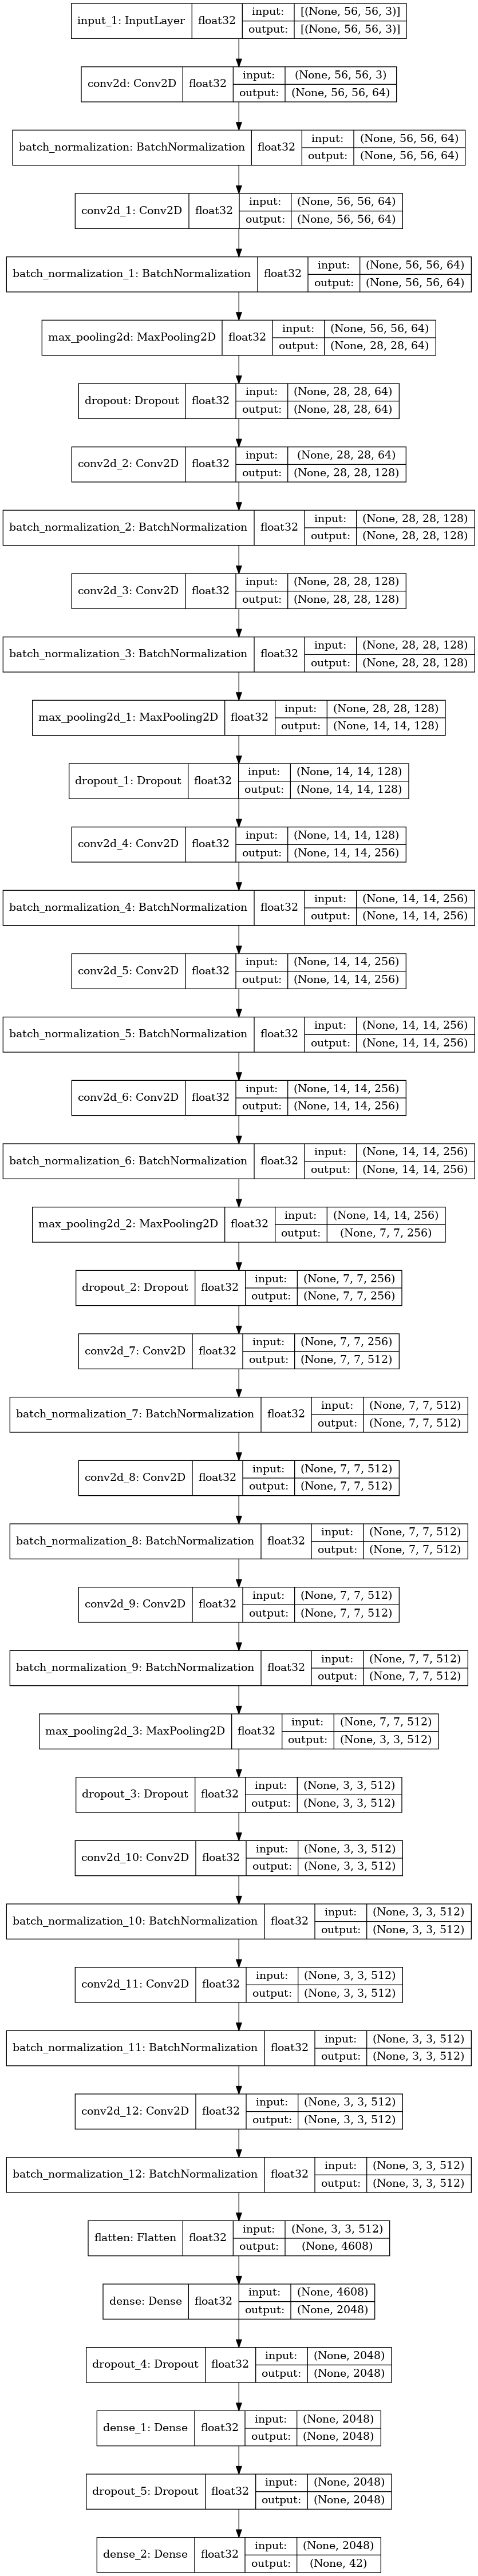

In [3]:
plot_model(model=exp_conv,
           to_file='VGGNet.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True)

In [4]:
tree_types = os.listdir('../input/leaf-disease-dataset-combination/image data/train')
X = []
y = []
val_x = []
val_y = []

for tree in tree_types:
    tree_path = os.path.join('../input/leaf-disease-dataset-combination/image data/train', tree)
    tree_disease_types = os.listdir(tree_path)

    for disease in tree_disease_types:
        img_name = os.listdir(os.path.join(tree_path, disease))

        for img in img_name:
            image_path = os.path.join(tree_path, disease, img)
            image = img_to_array(load_img(image_path, target_size=(56, 56)))
            X.append(image)
            y.append([tree, disease])

for tree in tree_types:
    tree_path = os.path.join('../input/leaf-disease-dataset-combination/image data/validation', tree)
    tree_disease_types = os.listdir(tree_path)

    for disease in tree_disease_types:
        img_name = os.listdir(os.path.join(tree_path, disease))

        for img in img_name:
            image_path = os.path.join(tree_path, disease, img)
            image = img_to_array(load_img(image_path, target_size=(56, 56)))
            val_x.append(image)
            val_y.append([tree, disease])


In [5]:
X = np.asarray(X)
val_x = np.asarray(val_x)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
val_y = mlb.transform(val_y)
generator = ImageDataGenerator(rescale=1. / 255,
                               vertical_flip=True,
                               horizontal_flip=True,
                               zoom_range=0.3)

In [6]:
X.shape, y.shape, val_x.shape, val_y.shape

((38104, 56, 56, 3), (38104, 42), (9458, 56, 56, 3), (9458, 42))

In [7]:
train_gen = generator.flow(X, y, batch_size=64)
val_gen = generator.flow(val_x, val_y, batch_size=64)

#### training

In [8]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=np.sqrt(0.1))

check_point = ModelCheckpoint(filepath='vggNet.hdf5',
                              monitor='val_loss',
                              save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=25,
                               restore_best_weights=True)

callbacks = [reduce_lr, check_point, early_stopping]

In [9]:
exp_conv.compile(optimizer=Adam(),
                loss=binary_crossentropy,
                metrics=['accuracy'])

In [10]:
exp_conv_history = exp_conv.fit(train_gen,
                            epochs=200,
                            callbacks=callbacks,
                            validation_data=val_gen)

2022-01-09 15:42:53.478109: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-01-09 15:42:55.733430: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


596/596 [==============================] - 41s 55ms/step - loss: 0.1042 - accuracy: 0.2572 - val_loss: 0.1659 - val_accuracy: 0.1392
Epoch 2/200
596/596 [==============================] - 33s 55ms/step - loss: 0.0583 - accuracy: 0.3387 - val_loss: 0.0633 - val_accuracy: 0.4357
Epoch 3/200
596/596 [==============================] - 32s 54ms/step - loss: 0.0430 - accuracy: 0.3715 - val_loss: 0.0541 - val_accuracy: 0.4272
Epoch 4/200
596/596 [==============================] - 32s 54ms/step - loss: 0.0355 - accuracy: 0.3774 - val_loss: 0.1174 - val_accuracy: 0.2984
Epoch 5/200
596/596 [==============================] - 32s 54ms/step - loss: 0.0293 - accuracy: 0.3861 - val_loss: 0.0510 - val_accuracy: 0.4527
Epoch 6/200
596/596 [==============================] - 32s 54ms/step - loss: 0.0239 - accuracy: 0.3896 - val_loss: 0.0383 - val_accuracy: 0.3802
Epoch 7/200
596/596 [==============================] - 32s 54ms/step - loss: 0.0215 - accuracy: 0.4091 - val_loss: 0.0987 - val_accuracy: 0.32

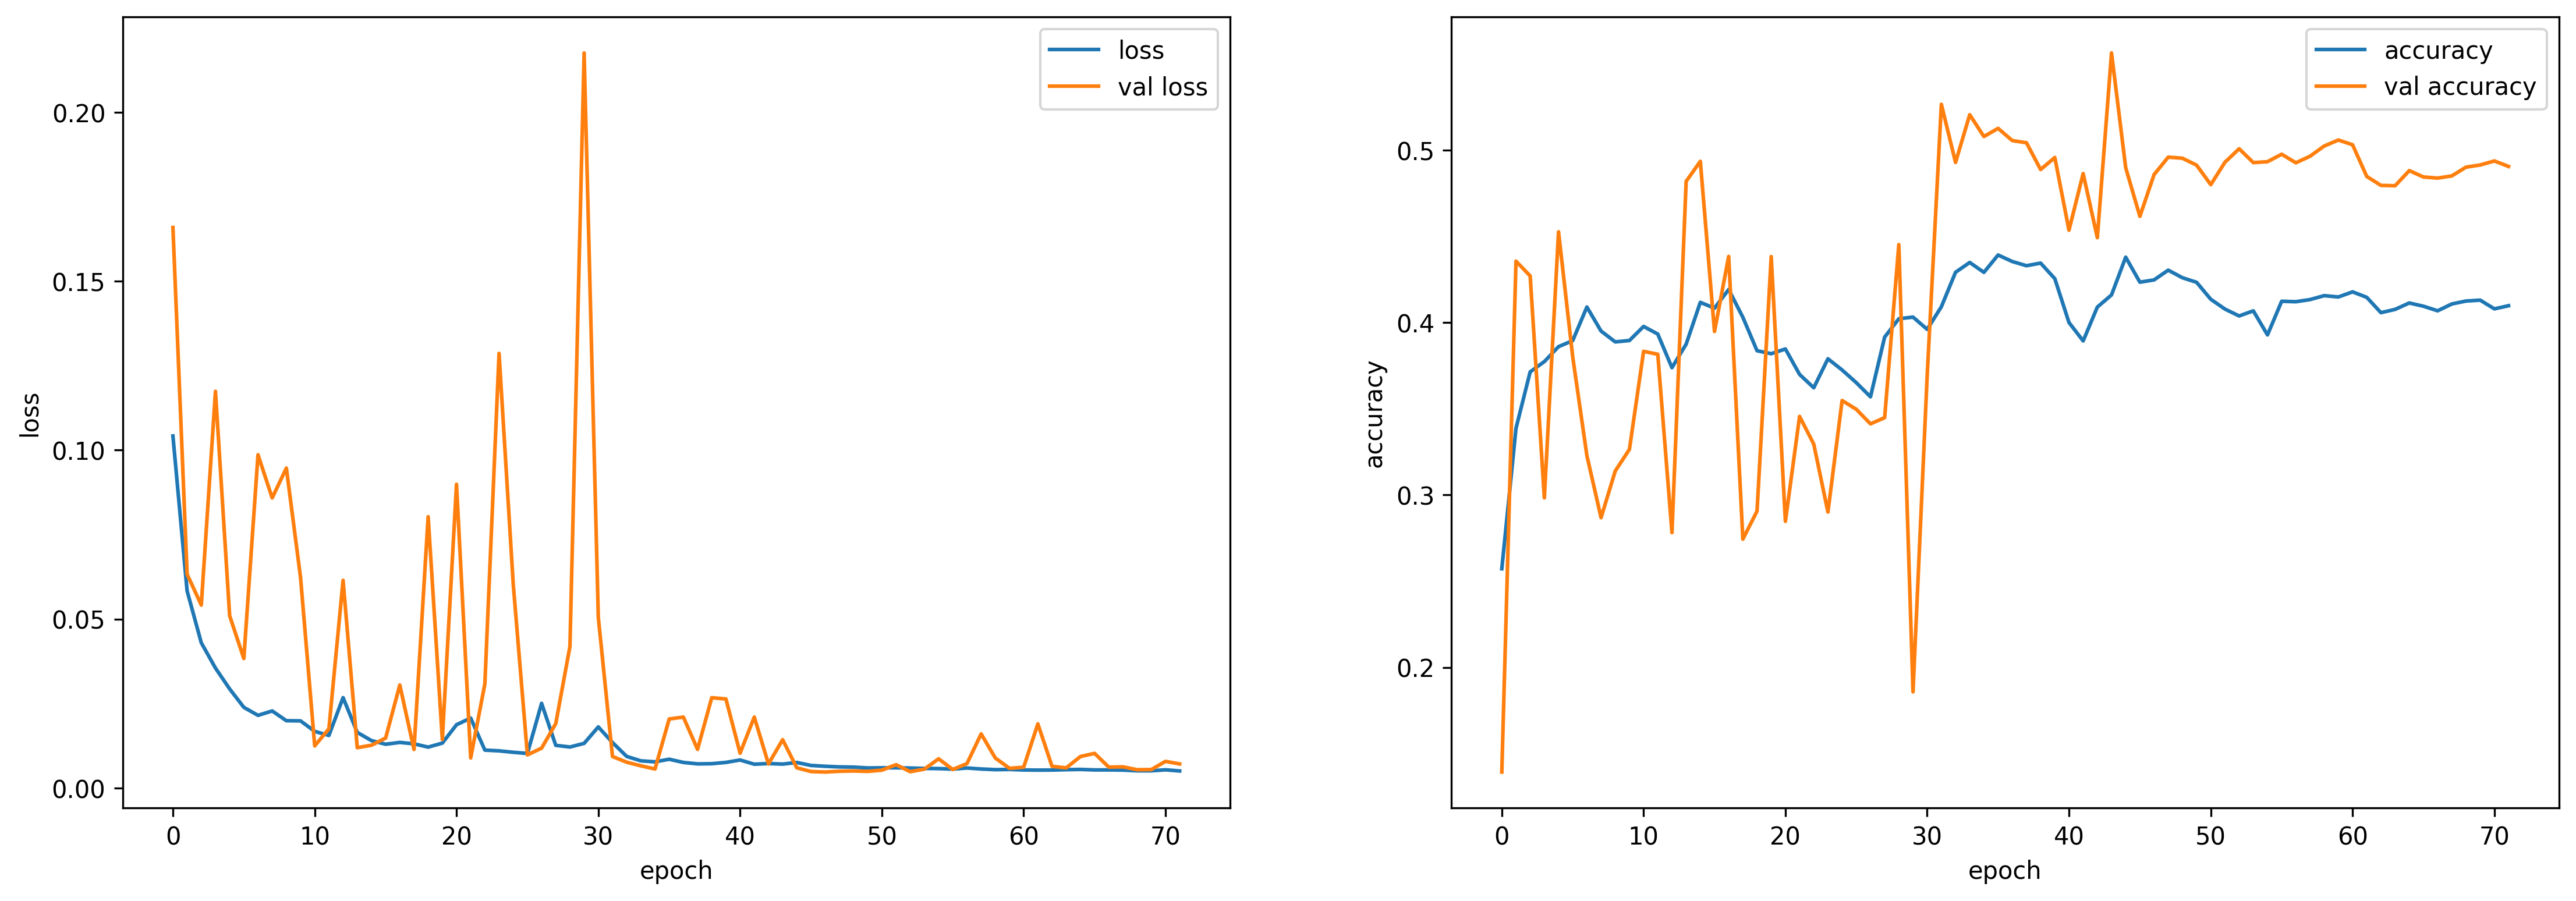

In [13]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(len(exp_conv_history.history['loss'])))

sns.lineplot(x=epochs, y=exp_conv_history.history['loss'], ax=axes[0], label='loss')
sns.lineplot(x=epochs, y=exp_conv_history.history['val_loss'], ax=axes[0], label='val loss')
sns.lineplot(x=epochs, y=exp_conv_history.history['accuracy'], ax=axes[1], label='accuracy')
sns.lineplot(x=epochs, y=exp_conv_history.history['val_accuracy'], ax=axes[1], label='val accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.savefig('VggNet_train_history.png')
plt.show()